In [1]:
#Group 10: Harihara, Wrootchit ,Zubin

#Implementation of k-NN algorithm for our dataset

#We implemented the kNN algortihm for our model from scratch, using the sklearn package ONLY for plotting the confusion matrix

In [2]:
#Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#For plotting the confusion matrix only
from sklearn.metrics import ConfusionMatrixDisplay 

In [3]:
#Before running the code, please download and place the dataset .csv file in the directory.
#The downlaod link is given below.

#'https://sbcb.inf.ufrgs.br/data/cumida/Genes/Leukemia/GSE28497/Leukemia_GSE28497.csv'

In [4]:
#First we open our raw data to check what the dataframe looks like
df = pd.read_csv('Leukemia_GSE28497.csv')
#df = pd.read_csv('Data.csv')
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM705467.CEL.gz,B-CELL_ALL,7.409521,5.009216,4.173607,7.315369,3.185411,7.620644,3.731541,3.471587,...,2.968822,3.223820,11.968681,12.100004,3.457507,2.967138,2.790814,2.563377,2.860505,2.608381
1,GSM705468.CEL.gz,B-CELL_ALL,7.177109,5.415108,4.426778,7.550818,3.134181,7.685723,3.907953,3.650995,...,2.982888,3.690411,12.318004,12.486741,3.396412,3.109629,2.856499,2.603355,2.908509,2.634063
2,GSM705469.CEL.gz,B-CELL_ALL,6.564918,5.248020,4.252414,7.175169,3.017718,7.956261,3.354557,3.302989,...,2.897425,3.611584,11.748222,11.807578,3.265585,3.057079,2.724642,2.440532,2.626871,2.673293
3,GSM705470.CEL.gz,B-CELL_ALL,6.872028,5.155963,4.388849,7.365933,3.031735,7.830002,3.508926,3.412491,...,3.024722,3.713087,12.208588,12.148604,3.175092,2.896168,2.798296,2.522343,2.762835,2.624163
4,GSM705471.CEL.gz,B-CELL_ALL,7.402105,5.509826,4.284291,7.214947,2.925269,7.789838,3.610425,3.362593,...,3.259802,4.096010,11.641305,11.713311,3.507025,3.119397,2.761294,2.546541,2.748511,2.738165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,GSM706002.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.692887,4.736595,4.503892,7.484208,3.137376,7.917993,3.858845,3.341846,...,3.215936,3.801296,12.292519,12.288550,3.402729,3.042387,2.965890,2.528686,2.705429,2.762513
277,GSM706003.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.209500,4.566413,4.637307,7.348777,3.018984,6.423441,3.669993,3.406887,...,3.266234,3.873540,11.971540,12.035205,3.321740,3.030698,2.826285,2.573647,2.942468,2.666361
278,GSM706004.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.046964,5.252467,4.420044,7.086734,2.913081,7.723025,3.474380,3.309239,...,3.150403,3.756845,11.977577,11.719864,3.541711,2.959812,2.760271,2.514172,2.811914,2.697337
279,GSM706005.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.347403,4.903981,4.281019,6.989415,2.968945,7.618195,3.492828,3.266248,...,3.204594,3.918882,11.936382,12.019612,3.383822,2.864419,2.739536,2.585459,2.710848,2.769975


In [5]:
#As we can see, there are 281 samples and 22285 features, with 7 classes. 

In [6]:
#We see that the class names are in the second column, so we print all the unique classes in our dataset.

unique_terms = df['type'].unique()
print(unique_terms)

['B-CELL_ALL' 'B-CELL_ALL_TCF3-PBX1' 'B-CELL_ALL_HYPERDIP'
 'B-CELL_ALL_HYPO' 'B-CELL_ALL_MLL' 'B-CELL_ALL_T-ALL'
 'B-CELL_ALL_ETV6-RUNX1']


In [7]:
#To simplify our classification problem, we replace each unique class (type) with its corresponding index from 1 to 7

#Create a dictionary to simplify the replacement step

map_dict = {'B-CELL_ALL':1, 'B-CELL_ALL_TCF3-PBX1': 2, 'B-CELL_ALL_HYPERDIP': 3,
 'B-CELL_ALL_HYPO': 4, 'B-CELL_ALL_MLL': 5, 'B-CELL_ALL_T-ALL': 6,'B-CELL_ALL_ETV6-RUNX1': 7}

#Replace unique terms with their respective values

df['type'] = df['type'].replace(map_dict)

#View the updated DataFrame

new_df = df.iloc[:, 1:]

arr = new_df.values

print(arr)
print()
print('The shape of the data is:' ,arr.shape)

[[1.         7.40952068 5.00921625 ... 2.56337737 2.86050524 2.60838058]
 [1.         7.17710864 5.41510846 ... 2.60335476 2.90850944 2.63406266]
 [1.         6.56491786 5.24801999 ... 2.44053215 2.626871   2.67329262]
 ...
 [7.         6.04696407 5.25246707 ... 2.51417214 2.81191377 2.69733706]
 [7.         6.34740294 4.90398114 ... 2.58545891 2.71084814 2.76997468]
 [7.         6.68736339 5.1363513  ... 2.52931788 2.69875691 2.7536624 ]]

The shape of the data is: (281, 22284)


In [8]:
#Here, the column 1 represents the leukemia subclass from 1-7 

In [9]:
#Next, we print out the labels in our dataset to check how many times each label is present in the data

first_column = arr[:, 0]
print('The labels in our entire dataset are:',first_column)
print()
print('The shape of the label column is:',first_column.shape)

The labels in our entire dataset are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]

The shape of the label column is: (281,)


In [10]:
#Now that we know what our data looks like, we can start working on implementing the kNN algorithm for our classification problem

In [11]:
#kNN is based on a distance metric, and for our implementation we use euclidean distance. We first a function for the same.

#We define a function for euclidean distance for distance between two corresponding gene points
def euclidean_distance(x1, x2):
    
    dist = np.sqrt(np.sum((x1 - x2)**2))
    
    return dist

In [12]:
#To make the implementation of the kNN easy, we build a class which runs the kNN for us. The class has three methods, init, sit and predict 

class KNN:
    
    #init will set the k value for our kNN run.
    def __init__(self, k):
        self.k = k
    
    #fit will fit the training data along with its corresponding labels
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    #Predict will run the kNN on test data, and then return the predicted labels for it, after running the kNN algorthm on it 
    def predict(self, X):
        
        predicted_labels = []
        
        for x in X:
            
            #Calculate the distances between the new data point and each point in the training data
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            #print(distances)
            
            #Select the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            #print(k_nearest_labels)
            
            #Count the number of neighbors in each class
            counts = np.bincount(k_nearest_labels)
            #print(counts)
            
            # Assign the new data point to the class with the highest number of neighbors
            predicted_labels.append(np.argmax(counts))

        return np.array(predicted_labels)

In [13]:
#For the validation of our model, we have also built functions which measure accuracy, recall, precision and the F1-score. 
#Each of these functions can be seen below.

In [14]:
#Compute accuracy calculates the accuracy of the true labels against predicted labels.
def compute_accuracy(y_true, y_pred):
    n_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            n_correct += 1
    accuracy = n_correct / len(y_true) #Number of correct entries / total entries 
    return accuracy

In [15]:
#Compute precision calculates the precision of the labels 
def compute_precision(y_true, y_pred, class_label):
    TP = 0 #Initialize true positive to 0
    FP = 0 #Initialize false positive to 0
    for i in range(len(y_true)):
        if y_pred[i] == class_label:
            if y_true[i] == class_label:
                TP += 1
            else:
                FP += 1
    if TP + FP == 0:
        precision = 0.0
    else:
        precision = TP / (TP + FP)
    return precision

In [16]:
#Compute recall calculates the recall of the labels
def compute_recall(y_true, y_pred, class_label):
    TP = 0 #Initialize true positive to 0
    FN = 0 #Initialize false negative to 0
    for i in range(len(y_true)):
        if y_true[i] == class_label:
            if y_pred[i] == class_label:
                TP += 1
            else:
                FN += 1
    if TP + FN == 0:
        recall = 0.0
    else:
        recall = TP / (TP + FN)
    return recall

In [17]:
#Compute f1 score calculates the f1 score of the labels using the precision and recall functions
def compute_f1_score(y_true, y_pred, class_label):
    precision = compute_precision(y_true, y_pred, class_label)
    recall = compute_recall(y_true, y_pred, class_label)
    if precision + recall == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [51]:
#Now we can implement the kNN algortihm on thedata to build a classifier. Before we do so, we do 10 fold cross validation since we have fairly fewer samples. 
#The implementation of the cross validation can be seen below.

In [18]:
# k-fold cross-validation

# First we need to define the number of folds
k = 10

# Shuffle the dataset randomly
np.random.seed(4)
indices = np.random.permutation(len(arr))

# Split the dataset into k groups
folds = np.array_split(indices, k)

# Initialize the lists to store accuracy for each fold
acc_list_train = []
acc_list_test = []

for i in range(k):
    print('For fold', i+1)
    
    # Create the training and testing datasets for the current fold
    test_indices = folds[i]
    train_indices = np.concatenate([folds[j] for j in range(k) if j != i])
    
    X_train = arr[train_indices, :]
    y_train = first_column[train_indices]
    X_test = arr[test_indices, :]
    y_test = first_column[test_indices]
    
    # Create an instance of the KNN class with k ranging from 1-10
    knn = KNN(k)

    # Fit the KNN classifier on the training data and labels
    knn.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)

    # Compute and store the accuracy for the current fold
    accuracy_train = compute_accuracy(y_train,y_pred_train)
    accuracy_test = compute_accuracy(y_test,y_pred)
    acc_list_train.append(accuracy_train)
    acc_list_test.append(accuracy_test)
    
    print("The accuracy of the training classification is: {:.2f} %".format((accuracy_train)*100))
    print("The accuracy of the testing classification is: {:.2f} %".format((accuracy_test)*100))
    print()
    
print("The mean accuracy of the training classification is: {:.2f} %".format(np.mean(acc_list_train)*100))
print("The mean accuracy of the testing classification is: {:.2f} %".format(np.mean(acc_list_test)*100))

For fold 1
The accuracy of the training classification is: 85.71 %
The accuracy of the testing classification is: 96.55 %

For fold 2
The accuracy of the training classification is: 85.38 %
The accuracy of the testing classification is: 82.14 %

For fold 3
The accuracy of the training classification is: 86.56 %
The accuracy of the testing classification is: 78.57 %

For fold 4
The accuracy of the training classification is: 84.98 %
The accuracy of the testing classification is: 89.29 %

For fold 5
The accuracy of the training classification is: 86.56 %
The accuracy of the testing classification is: 71.43 %

For fold 6
The accuracy of the training classification is: 86.96 %
The accuracy of the testing classification is: 75.00 %

For fold 7
The accuracy of the training classification is: 84.19 %
The accuracy of the testing classification is: 85.71 %

For fold 8
The accuracy of the training classification is: 86.56 %
The accuracy of the testing classification is: 85.71 %

For fold 9
The a

In [19]:
#Now that we have the accuracy from the cross validation, we can test our model to see how well our classifier performs.

In [20]:
# Shuffle the dataset randomly
np.random.seed(42)
indices = np.random.permutation(len(arr))
# print(indices)

#We split the model into an 80-20 set where 80% of the data is used as a training dataset. 
#Here, 20% of the model is used as a test dataset.
X_train = arr[indices[:int(0.8*len(arr))], :]

#print(X_train.shape)
#print(X_train)

y_train = first_column[indices[:int(0.8*len(arr))]]

#print(y_train.shape)
#print(y_train)

X_test = arr[indices[int(0.8*len(arr)):], :]

#print(X_test.shape)
#print(X_test)

y_test = first_column[indices[int(0.8*len(arr)):]]

#print(y_test.shape)
#print(y_test)

# Initialize the lists to store accuracy for training and testing accuracy
k_list = []
acc_list_test = []
acc_list_train = []

#Range over 15 nearest neighbour sizes, to determine which k value gives the highest accuracy.
for k in range(1,16):
    
    k_list.append(k)
    
    print('For',k,'neighbours, the results are as shown below:') 
    print()

    # Create an instance of the KNN class with k ranging from 1-15
    knn = KNN(k)

    # Fit the KNN classifier on the training data and labels
    knn.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)

    print('The test classes are:', y_test)
    print('The predicted classes are:',y_pred)

    print()
    accuracy = compute_accuracy(y_test,y_pred)
    accuracy_train = compute_accuracy(y_train,y_pred_train)
    
    print("The accuracy of the training classification is: {:.2f} %".format((accuracy_train)*100))
    print("The accuracy of the testing classification is: {:.2f} %".format((accuracy)*100))
    
    print('-----------------------------------------------------------------------------------------------------------------')
    print()
    
    acc_list_test.append(accuracy)
    acc_list_train.append(accuracy_train)

For 1 neighbours, the results are as shown below:

The test classes are: [7. 1. 5. 6. 7. 3. 2. 2. 3. 1. 2. 1. 1. 1. 2. 3. 1. 5. 1. 7. 3. 7. 7. 7.
 1. 7. 1. 3. 1. 7. 5. 7. 6. 6. 5. 1. 1. 7. 7. 1. 4. 6. 7. 4. 3. 4. 3. 2.
 6. 3. 7. 1. 6. 1. 3. 7. 3.]
The predicted classes are: [7 3 5 6 7 3 2 2 1 1 2 3 1 1 2 3 1 5 1 7 3 7 7 7 1 4 1 4 1 7 5 7 6 6 5 1 1
 7 1 4 3 6 7 4 3 1 3 2 6 3 7 4 6 1 3 7 1]

The accuracy of the training classification is: 100.00 %
The accuracy of the testing classification is: 80.70 %
-----------------------------------------------------------------------------------------------------------------

For 2 neighbours, the results are as shown below:

The test classes are: [7. 1. 5. 6. 7. 3. 2. 2. 3. 1. 2. 1. 1. 1. 2. 3. 1. 5. 1. 7. 3. 7. 7. 7.
 1. 7. 1. 3. 1. 7. 5. 7. 6. 6. 5. 1. 1. 7. 7. 1. 4. 6. 7. 4. 3. 4. 3. 2.
 6. 3. 7. 1. 6. 1. 3. 7. 3.]
The predicted classes are: [7 1 5 6 7 3 2 2 1 1 2 1 1 1 2 3 1 5 1 7 3 7 7 7 1 4 1 1 1 7 5 7 6 6 5 1 1
 7 1 1 1 6 7 4 1 1 3 2 6 1 7 4

The test classes are: [7. 1. 5. 6. 7. 3. 2. 2. 3. 1. 2. 1. 1. 1. 2. 3. 1. 5. 1. 7. 3. 7. 7. 7.
 1. 7. 1. 3. 1. 7. 5. 7. 6. 6. 5. 1. 1. 7. 7. 1. 4. 6. 7. 4. 3. 4. 3. 2.
 6. 3. 7. 1. 6. 1. 3. 7. 3.]
The predicted classes are: [7 3 1 6 7 3 2 2 1 3 2 3 1 1 2 3 3 3 1 7 3 7 7 7 1 7 1 1 1 7 5 7 6 6 5 1 1
 7 7 1 1 6 7 1 3 1 3 2 6 3 7 1 6 1 3 7 3]

The accuracy of the training classification is: 82.59 %
The accuracy of the testing classification is: 80.70 %
-----------------------------------------------------------------------------------------------------------------



In [21]:
#Now, we want to identofy what the best value of k is. We select this based on the k value which gives the highest test accuracy. 
#To determine this we plot the test accuracy vs k 

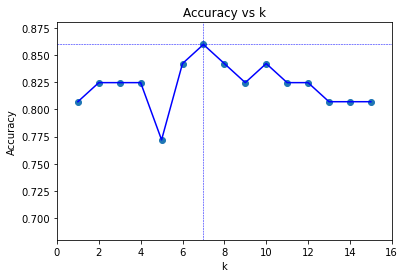

In [22]:
#The plot of accuracy of test data against cluster size
plt.figure()
plt.scatter(k_list, acc_list_test, marker='o')
plt.plot(k_list, acc_list_test, linestyle='-', color='b', )
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xlim(0, 16, 1)
plt.axvline(x=7, color='b', linestyle='--',linewidth = '0.5') # vertical line at x=7
plt.axhline(y=acc_list_test[k_list.index(7)], color='b', linestyle='--',linewidth = '0.5') # horizontal line at y=accuracy value for k=7
plt.ylim(0.68, 0.88)
plt.title('Accuracy vs k')
plt.show()

In [23]:
#As we can see, the k=7 has the highest accuracy of nearly 86%. 
#For our classification, we will use k = 7 

#Now we try to carry out the classification for the test samples for k=7.

For 7 neighbours, the results are as shown below:

The test classes are: [7. 1. 5. 6. 7. 3. 2. 2. 3. 1. 2. 1. 1. 1. 2. 3. 1. 5. 1. 7. 3. 7. 7. 7.
 1. 7. 1. 3. 1. 7. 5. 7. 6. 6. 5. 1. 1. 7. 7. 1. 4. 6. 7. 4. 3. 4. 3. 2.
 6. 3. 7. 1. 6. 1. 3. 7. 3.]
The predicted classes are: [7 3 5 6 7 3 2 2 1 3 2 1 1 1 2 3 3 3 1 7 3 7 7 7 1 7 1 3 1 7 5 7 6 6 5 1 1
 7 7 1 7 6 7 1 3 1 3 2 6 3 7 1 6 1 3 7 3]

The accuracy of the training classification is: 86.61 %
The accuracy of the testing classification is: 85.96 %

Precision of class 1 is 0.8000
Recall of class 1 is 0.8000
F1 score of class 1 is 0.8000

Precision of class 2 is 1.0000
Recall of class 2 is 1.0000
F1 score of class 2 is 1.0000

Precision of class 3 is 0.6923
Recall of class 3 is 0.9000
F1 score of class 3 is 0.7826

Precision of class 4 is 0.0000
Recall of class 4 is 0.0000
F1 score of class 4 is 0.0000

Precision of class 5 is 1.0000
Recall of class 5 is 0.7500
F1 score of class 5 is 0.8571

Precision of class 6 is 1.0000
Recall of clas

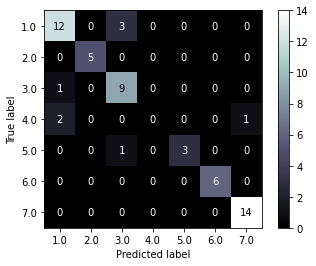

In [24]:
#We test for 7 nearest neighbours
k = 7 
    
print('For',k,'neighbours, the results are as shown below:') 
print()

# Create an instance of the KNN class with k=7
knn = KNN(k)

# Fit the KNN classifier on the training data and labels
knn.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)


print('The test classes are:', y_test)
print('The predicted classes are:',y_pred)

print()
accuracy = compute_accuracy(y_test,y_pred)
accuracy_train = compute_accuracy(y_train,y_pred_train)
    
print("The accuracy of the training classification is: {:.2f} %".format((accuracy_train)*100))
print("The accuracy of the testing classification is: {:.2f} %".format((accuracy)*100))
acc_list_test.append(accuracy)
acc_list_train.append(accuracy_train)
print()

#We also print the confusion matrix, as this will help us understand the precision, recall and f1 score of the model.
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'bone')

#We print each of these parameters for each class from 1 to 7
for i in range(1,8):
    precision = compute_precision(y_test, y_pred, class_label=i)

    # Print the precision
    print('Precision of class', i, 'is {:.4f}'.format(precision))
    recall = compute_recall(y_test, y_pred, class_label=i)

    # Print the recall
    print('Recall of class',i,'is {:.4f}'.format(recall))

    f1_score = compute_f1_score(y_test, y_pred, class_label=i)

    # Print the precision
    print('F1 score of class',i,'is {:.4f}'.format(f1_score))
        
    print()
print('------------------------------------------------------------------------------------------------------------')

In [59]:
# As we can see, we are able to obtain the confusion matrix for the 7 classes of interest in our dataset. We also have the precion recall and f1 score of each class
# We also have the overall accuracy of the kNN model. 
# A detailed explanation of the results can be found in the report submitted.